# Series Solutions
George Poole grp39@cam.ac.uk

## Ordinary Points

Consider the differential equation

$$r(x)y''(x)+p(x)y'(x)+r(x)y(x)=0~~~.$$

If both $p(x)/r(x)$ and $q(x)/r(x)$ are analytic at the point $x=x_0$, then $x=x_0$ is said to be a ordinary point. Series solutions about this point take the form

$$y(x)=\sum_{n=0}^\infty a_n(x-x_0)^n$$

so substituting this in gives

$$0=\sum_{n=0}^\infty n(n-1)a_nr(x)(x-x_0)^{n-2}+na_np(x)(x-x_0)^{n-1}+a_nq(x)(x-x_0)^n~~~.$$

In general $r(x), p(x), q(x)$ can be any functions provided that $p(x)/r(x)$ and $q(x)/r(x)$ are analytic at $x=x_0$. These would then be written as Taylor series about $x=x_0$. For simplicity, let's consider the case where $r(x), p(x), q(x)$ are cubic polynomials; this is the most commonly observed case anyway. We write

$$r(x)=r_0+r_1x+r_2x^2+r_3x^3$$

and similarly for $p(x), q(x)$.

We then get coefficients for each of $x^{n-2},\dots, x^{n+3}$.

$$\begin{align}
&x^{n-2}~:~\alpha(n)=n(n-1)a_nr_0\\
&x^{n-1}~:~\beta(n)=n(n-1)a_nr_1+na_np_0\\
&x^n~~~~:~\gamma(n)=n(n-1)a_nr_2+na_np_1+a_nq_0\\
&x^{n+1}~:~\delta(n)=n(n-1)a_nr_3+na_np_2+a_nq_1\\
&x^{n+2}~:~\epsilon(n)=na_np_3+a_nq_2\\
&x^{n+3}~:~\zeta(n)=a_nq_3
\end{align}$$

so we can write

$$0=\sum_{n=0}^\infty[\alpha(n+2)+\beta(n+1)+\gamma(n)+\delta(n-1)+\epsilon(n-2)+\zeta(n-3)](x-x_0)^n$$

and therefore 

$$\alpha(n+2)+\beta(n+1)+\gamma(n)+\delta(n-1)+\epsilon(n-2)+\zeta(n-3)=0$$

for all $n\geq0$. From this we get the recurrence relation

$$[(n+2)(n+1)r_0]a_{n+2}+[(n+1)nr_1+(n+1)p_0]a_{n+1}+[]a_n+[]a_{n-1}+[]a_{n-2}+q_3a_{n-3}+=0$$

$$a_{n+2}=-\frac{(n+1)nr_1+(n+1)p_0}{(n+2)(n+1)r_0}a_{n+1}-\frac{n(n-1)r_2+np_1+q_0}{(n+2)(n+1)r_0}a_n\dots$$

for all $n\geq0$. Note that $a_n=0$ for $n\leq1$ and $a_0,a_1$ are arbitrary constants. 

As an example, let's consider

$$r(x)=1+x^3$$

$$p(x)=1$$

$$q(x)=1$$

for which the differential has an ordinary point at $x=x_0=0$. The Python program below computes the coefficients of the truncated series solution

$$y(x)\approx\sum_{n=0}^Na_n(x-x_0)^n~~~,$$

taking the arbitrary constant as $a_0=a_1=1$.

In [2]:
x_0=0
a_0=1
a_1=1
N=20

poly=3

r=[1,0,0,1]
p=[1,0,0,0]
q=[1,0,0,0]

def denom(n):
    return (n+2)*(n+1)*r[0]

def func1(n):
    return ((n+1)*n*r[1]+(n+1)*p[0])/denom(n)

def func2(n):
    return (n*(n-1)*r[2]+n*p[1]+q[0])/denom(n)

def func3(n):
    return ((n-1)*(n-2)*r[3]+(n-1)*p[2]+q[1])/denom(n)

def func4(n):
    return ((n-2)*p[3]+q[2])/denom(n)

def func5(n):
    return q[3]/denom(n)

a=[0.0]*(N+poly)
a[0]=a_0
a[1]=a_1

for n in range(0,N-2):
    a[n+2]=-func1(n)*a[n+1]-func2(n)*a[n]-func3(n)*a[n-1]-func4(n)*a[n-2]-func5(n)*a[n-3]

new_a=[0.0]*N

for n in range(0,N):
    new_a[n]=a[n]
    
a=new_a

Let's now compare our series solution with a numerical solution.

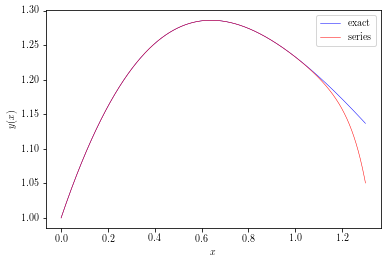

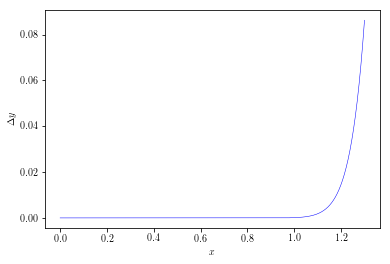

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def poly_r(x):
    return r[0]+r[1]*x+r[2]*x**2+r[3]*x**3

def poly_p(x):
    return p[0]+p[1]*x+p[2]*x**2+p[3]*x**3

def poly_q(x):
    return q[0]+q[1]*x+q[2]*x**2+q[3]*x**3

def dydx(Y,x):
    y1,y2=Y
    dy1dx=y2
    dy2dx=-poly_p(x)*y2/poly_r(x)-poly_q(x)*y1/poly_r(x)
    return dy1dx, dy2dx

def series(x):
    y=0
    for n in range(0,N):
        y=y+a[n]*(x-x_0)**n
    return y

Y_0=[a_0,a_1]
x=np.linspace(0,1.3,num=1000)
y1,y2=odeint(dydx,Y_0,x).T

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

plt.figure(1)
plt.plot(x,y1,lw=0.5,color='b')
plt.plot(x,series(x),lw=0.5,color='r')
plt.legend(['exact','series'])
plt.xlabel('$x$')
plt.ylabel('$y(x)$')

plt.figure(2)
plt.plot(x,np.abs(y1-series(x)),lw=0.5,color='b')
plt.xlabel('$x$')
plt.ylabel('$\Delta y$')

plt.show()

## Related Courses

* Differential Equations, Part IA Mathematics
* Mathematical Methods I, Part IB NST Mathematics
* Asymptotic Methods, Part II Mathematics